In [82]:
from google.colab import drive
import pandas as pd # Import pandas

drive.mount('/content/drive')



# Load the dataset
df = pd.read_excel('/content/drive/My Drive/Data extration_slr_31_8_25.xlsx')

# Display the first 5 rows
display(df.head())

# Display the column names and their data types
display(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,First author,Year of publication,Journal name,Title of article,Country,Funded by,Sample Population,Sampling Method/Technique,Sampling Method,Mode of administration?,...,Selected Model Data,Is there a protocol for SWTD?,"If yes, then which protocol?",Time horizon (T) for SWTD,Are the SWTD values transformed/censored?,"If yes, what is the range?",Minimum Value,% states with negative values,Valuation Protocol,Number of negative heath state
0,Xie F et al.,2016,Medical Care,A Time Trade-off-derived Value Set of the EQ-5...,Canada,Government,GP,quota sampling to select a sample representati...,quota,face to face computer-assisted personal interv...,...,TTO data,yes,LT-TTO,10 years,"yes, censoring at −1",Maximum value: 0.949\nMinimum value: −0.148,-0.148,0.0186,EQ-VT v1.0,58 out of 3125
1,Nancy J. Devlin et al,2017,Health Economics,Valuing health-related quality of life: An EQ-...,England,EuroQol and Government,GP,66 primary sampling units randomly selection b...,systematic,face to face computer-assisted personal interv...,...,cTTO and DCE data,yes,LT-TTO,The variant of lead time TTO used in this stud...,"yes, censoring at −1",Maximum value: 1\n Minimum value: −0.285,-0.285,0.051,EQ-VT v1.0,159 out of 3125
2,Purba et al.,2017,PharmacoEconomics,The Indonesian EQ-5D-5L Value Set.,Indonesia,EuroQol and Government,GP,A multi-stage stratified quota sampling with r...,multistage stratified quota,face to face computer-assisted personal interv...,...,cTTO and DCE data,yes,LT-TTO,The two lives in the lead-time TTO are 10 yea...,"yes, censoring at −1",Maximum value: 1\nMinimum value: −0.865,,0.355,EQ-VT v2.0,1108 out of 3125
3,Shiroiwa et al.,2016,Value in Health,Comparison of Value Set Based on DCE and/or TT...,Japan,Government,GP,stratified by sex and age group in 5 location,stratified,face to face computer-assisted personal interv...,...,cTTO data,yes,LT-TTO,respondents were asked to imagine living in a...,"yes, censoring at −1",Maximum value: 1\nMinimum value: −0.025,-0.025,0.000003,EQ-VT v1.1,1 out of 3125
4,Luo et al.,2017,Value in Health,Estimating an EQ-5D-5L value set for China.,China,EuroQol and Academia,GP,a nonprobability sampling method sampled to re...,nonprobability,face to face computer-assisted personal interv...,...,cTTO data,yes,LT-TTO,For health states considered worse than dead...,"yes, censoring at −1",Maximum value: 1\nMinimum value: −0.285,-0.285,0.1011,EQ-VT v1.0,316 out of 3125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   First author                                      49 non-null     object
 1   Year of publication                               49 non-null     int64 
 2   Journal name                                      49 non-null     object
 3   Title of article                                  49 non-null     object
 4   Country                                           49 non-null     object
 5   Funded by                                         49 non-null     object
 6   Sample Population                                 47 non-null     object
 7   Sampling Method/Technique                         46 non-null     object
 8   Sampling Method                                   44 non-null     object
 9   Mode of administration?           

None

In [83]:
# Ensure the sample size column is numeric, coercing errors
df['sample size'] = pd.to_numeric(df['sample size'], errors='coerce')

# Count studies with sample size > 1000
studies_greater_than_1000 = df[df['sample size'] > 1000].shape[0]

# Count studies with sample size <= 1000
studies_less_than_equal_1000 = df[df['sample size'] <= 1000].shape[0]

print(f"Number of studies with sample size greater than 1000: {studies_greater_than_1000}")
print(f"Number of studies with sample size less than or equal to 1000: {studies_less_than_equal_1000}")

Number of studies with sample size greater than 1000: 27
Number of studies with sample size less than or equal to 1000: 20


In [84]:
# Calculate the frequency distribution of 'Selected Model Data ' (corrected column name)
print("\nFrequency Distribution of 'Selected Model Data':")
display(df['Selected Model Data '].value_counts(dropna=False))


# Calculate the frequency distribution of 'Is there a protocol for SWTD? ' (corrected column name)
print("\nFrequency Distribution of 'Is there a protocol for SWTD?':")
display(df['Is there a protocol for SWTD? '].value_counts(dropna=False))


Frequency Distribution of 'Selected Model Data':


,count
Selected Model Data,
cTTO and DCE data,24
cTTO data,11
TTO data,3
DCE and cTTO data,2
NaN,2
VAS data,1
cTTO data,1
TTO and VAS data,1
cTTO data,1



Frequency Distribution of 'Is there a protocol for SWTD?':


,count
Is there a protocol for SWTD?,
yes,43
NaN,3
no,3


In [85]:
# Calculate and display the frequency distribution of 'Funded by'
print("Frequency Distribution of 'Funded by':")
display(df['Funded by'].value_counts(dropna=False))

# Calculate and display the frequency distribution of 'Sampling Method'
print("\nFrequency Distribution of 'Sampling Method':")
display(df['Sampling Method'].value_counts(dropna=False))

Frequency Distribution of 'Funded by':


,count
Funded by,
EuroQol and Government,15
EuroQol and Academia,8
Government,5
EuroQol,5
Not funded,4
"EuroQol, Academia and Government",3
EuroQol and Pharmaceutical industry,3
Pharmaceutical industry,2
Academia and Government,2



Frequency Distribution of 'Sampling Method':


,count
Sampling Method,
quota,10
NaN,5
stratified,4
Multistage stratified quota,4
stratified quota,3
probability,2
random,2
quota,1
systematic,1


In [86]:
# Identify relevant columns
study_characteristics_cols = [
    'Year of publication',
    'Country',
    'sample size', # Corrected column name
    'Sample Population',
    'Sampling Method/Technique',
    'Mode of administration?'
]

# Analyze distributions
for col in study_characteristics_cols:
    print(f"\nAnalyzing column: {col}")
    if col in ['Year of publication', 'sample size']:
        # Descriptive statistics for numerical columns
        display(df[col].describe())
    else:
        # Value counts for categorical columns
        display(df[col].value_counts(dropna=False))


Analyzing column: Year of publication


,Year of publication
count,49.000000
mean,2019.755102
std,2.890578
min,2014.000000
25%,2018.000000
50%,2020.000000
75%,2022.000000
max,2025.000000



Analyzing column: Country


,count
Country,
Poland,2
Slovania,2
Sweden,2
Germany,2
Iran,2
China,1
Korea,1
Netherlands,1
Japan,1



Analyzing column: sample size


,sample size
count,47.000000
mean,1249.276596
std,1186.950270
min,200.000000
25%,975.000000
50%,1014.000000
75%,1169.500000
max,8114.000000



Analyzing column: Sample Population


,count
Sample Population,
GP,47
NaN,2



Analyzing column: Sampling Method/Technique


,count
Sampling Method/Technique,
NaN,3
66 primary sampling units randomly selection based on postcode sectors and 37 addresses selcted using systematic sampling within each sampling unit,1
"quota sampling to select a sample representative in terms of age, sex, and education status from the wider Canadian general population",1
stratified by sex and age group in 5 location,1
"a nonprobability sampling method sampled to represent these cities with respect to age, gender and educational level u",1
"Strata-based sampling with respect to age, gender and educational level as recorded by the by Statistics Netherlands",1
"A multi-stage stratified quota sampling with respect to residence, gender, age, and level of education (stage 1) and with respect to religion and ethnicity (stage 2) was applied,",1
"multistage stratified quota method. A sample quota was assigned to each of the 15 regions according to population \nstructure (population in region, sex, age, and education level)",1
"A stratified sampling with quotas by location, gender, age and socio-economic status was used to respect the Uruguayan population structure",1



Analyzing column: Mode of administration?


,count
Mode of administration?,
face to face computer-assisted personal interviews (CAPI),37
NaN,3
face to face paper based interview,2
face to face computer-assisted personal interviews (CAPI) and videoconferencing (VC) administered interviews.,2
"cross-sectional, population-based, self-administered postal health survey, the EQ-5D-5L descriptive system, EQ visual analogue scale and a time trade-off question were included.",1
"cross-sectional, interviewer-administered face to face computer-assisted personal interviews (CAPI)",1
videoconferencing (VC) administered interviews andcomputer assisted personal interviews (CAPI),1
face to face computer-assisted personal interviews (CAPI) and videoconferencing (VC) administered interviews,1
online survey,1


In [87]:
# Calculate the frequency distribution of 'Year of publication'
print("Number of articles published each year:")
display(df['Year of publication'].value_counts().sort_index())

Number of articles published each year:


,count
Year of publication,
2014,1
2015,2
2016,4
2017,5
2018,7
2019,3
2020,8
2021,4
2022,6


In [88]:
# Calculate the frequency distribution of 'Journal name'
print("Journal name:")
display(df['Journal name'].value_counts().sort_index())

Journal name:


,count
Journal name,
VALUE IN HEALTH,3
VALUE in HEALTH,1
Value in Health,1
Applied Health Economics and Health Policy,2
Expert Review of Pharmacoeconomics & Outcomes Research.,1
Health Economics,1
Health and Quality of Life Outcomes,2
Medical Care,1
Medical Journal of the Islamic Republic of Iran (MJIRI),1


In [89]:
# Calculate the frequency distribution of 'Mode of administration?'
print("Mode of administration?:")
display(df['Mode of administration?'].value_counts().sort_index())

Mode of administration?:


,count
Mode of administration?,
"cross-sectional, interviewer-administered face to face computer-assisted personal interviews (CAPI)",1
videoconferencing (VC) administered interviews andcomputer assisted personal interviews (CAPI),1
"cross-sectional, population-based, self-administered postal health survey, the EQ-5D-5L descriptive system, EQ visual analogue scale and a time trade-off question were included.",1
face to face computer-assisted personal interviews (CAPI),37
face to face computer-assisted personal interviews (CAPI) and videoconferencing (VC) administered interviews,1
face to face computer-assisted personal interviews (CAPI) and videoconferencing (VC) administered interviews.,2
face to face paper based interview,2
online survey,1


In [90]:
# Calculate the frequency distribution of ' Preference elicitation/Valuation Technique(s)'
print(" Preference elicitation/Valuation Technique(s):")
display(df['Preference elicitation/Valuation Technique(s)'].value_counts().sort_index())

 Preference elicitation/Valuation Technique(s):


,count
Preference elicitation/Valuation Technique(s),
c-TTO,1
DCE,1
DCE and c-TTO,39
TTO,4
TTO and VAS,1
VAS,1
c-TTO,1
c-TTO and tTTO,1


## Compare valuation methodologies


Analyze and compare the valuation methodologies used across studies, including valuation protocol, health state perspective, TTO design, and techniques for handling negative values.


In [91]:
# Print unique values and their counts for 'Valuation Protocol '
print("Valuation Protocol Distribution:")
display(df['Valuation Protocol '].value_counts(dropna=False))

# Print unique values and their counts for 'Valuing own health or hypothetical health state?' - this seems to be the 'Perspective' column
print("\nHealth State Perspective Distribution:")
display(df['Valuing own health or hypothetical health state?'].value_counts(dropna=False))

# Print unique values and their counts for 'Preference elicitation/Valuation Technique for SWD' - this seems to be related to 'TTO Design'
print("\nPreference Elicitation/Valuation Technique (related to TTO Design) Distribution:")
display(df['Preference elicitation/Valuation Technique(s)'].value_counts(dropna=False))


# Print unique values and their counts for 'Are the SWTD values transformed/censored?'
print("\nAre the SWTD values transformed/censored? Distribution:")
display(df['Are the SWTD values transformed/censored?'].value_counts(dropna=False))

# Examine 'If yes, what is the range?' and '% states with negative values'
print("\nDetails on handling and impact of negative values:")
display(df[['If yes, what is the range?', '% states with negative values']].head())

Valuation Protocol Distribution:


,count
Valuation Protocol,
EQ-VT v2.1,13
EQ-VT v2.0,10
EQ-VT v1.0,6
EQ-VT v1.1,4
EQ-VT standardized valuation protocol,4
EQ crosswalk methodology,3
EQ-PVT,3
EQ-VAS,2
EQ-VT v2.1,1



Health State Perspective Distribution:


,count
Valuing own health or hypothetical health state?,
both,42
NaN,3
valueing own health state,2
other,1
hyphothetical,1



Preference Elicitation/Valuation Technique (related to TTO Design) Distribution:


,count
Preference elicitation/Valuation Technique(s),
DCE and c-TTO,39
TTO,4
c-TTO and tTTO,1
c-TTO,1
VAS,1
c-TTO,1
TTO and VAS,1
DCE,1



Are the SWTD values transformed/censored? Distribution:


,count
Are the SWTD values transformed/censored?,
"yes, censoring at −1",40
NaN,6
"yes, left-censored at -1",1
"yes, censored at “−2”",1
"yes, censored at -1",1



Details on handling and impact of negative values:


,"If yes, what is the range?",% states with negative values
0,Maximum value: 0.949\nMinimum value: −0.148,0.0186
1,Maximum value: 1\n Minimum value: −0.285,0.051
2,Maximum value: 1\nMinimum value: −0.865,0.355
3,Maximum value: 1\nMinimum value: −0.025,0.000003
4,Maximum value: 1\nMinimum value: −0.285,0.1011


## Analyze frequency and range of negative values

Analyze the frequency and range of negative WTD values reported in the studies, including the proportion of states valued below 0 and how this varies by country, protocol version, or model type.


In [92]:
# Inspect the columns
print("Columns related to negative values:")
display(df[['% states with negative values', 'If yes, what is the range?', 'Country', 'Valuation Protocol ']].head())

# Calculate descriptive statistics for '% states with negative values'
print("\nDescriptive statistics for '% states with negative values':")
display(df['% states with negative values'].describe())

Columns related to negative values:


,% states with negative values,"If yes, what is the range?",Country,Valuation Protocol
0,0.0186,Maximum value: 0.949\nMinimum value: −0.148,Canada,EQ-VT v1.0
1,0.051,Maximum value: 1\n Minimum value: −0.285,England,EQ-VT v1.0
2,0.355,Maximum value: 1\nMinimum value: −0.865,Indonesia,EQ-VT v2.0
3,0.000003,Maximum value: 1\nMinimum value: −0.025,Japan,EQ-VT v1.1
4,0.1011,Maximum value: 1\nMinimum value: −0.285,China,EQ-VT v1.0



Descriptive statistics for '% states with negative values':


,% states with negative values
count,48
unique,47
top,0
freq,2


In [93]:
# Convert '% states with negative values' to numeric, replacing ',' with '.' and coercing errors
df['% states with negative values'] = df['% states with negative values'].astype(str).str.replace(',', '.', regex=False)
df['% states with negative values'] = pd.to_numeric(df['% states with negative values'], errors='coerce')


# Analyze '% states with negative values' by 'Country'
print("\nMean '% states with negative values' by Country:")
display(df.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False))

# Analyze '% states with negative values' by 'Valuation Protocol '
print("\nMean '% states with negative values' by Valuation Protocol:")
display(df.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False))


Mean '% states with negative values' by Country:


,% states with negative values
Country,
Iran,0.536000
Taiwan,0.502700
Peru,0.433000
Morocco,0.406700
Uganda,0.402500
Ireland,0.360000
Egypt,0.359400
Hong Kong,0.356500
Indonesia,0.355000



Mean '% states with negative values' by Valuation Protocol:


,% states with negative values
Valuation Protocol,
EQ-VT v2.6.1,0.406700
EQ-PVT,0.357500
EQ crosswalk methodology,0.352000
EQ-VT v2.0,0.209710
EQ-VT standardized valuation protocol,0.206400
EQ-VT v2.1,0.175223
EQ-VT v2.1,0.167400
EQ crosswalk methodology,0.131480
EQ-VT v1.0,0.078383


In [94]:
import re

def extract_min_max(range_str):
    if pd.isna(range_str):
        return None, None
    min_match = re.search(r'Minimum value:\s*([−-]?\d+\.?\d*)', range_str)
    max_match = re.search(r'Maximum value:\s*([−-]?\d+\.?\d*)', range_str)
    min_val = float(min_match.group(1).replace('−', '-')) if min_match else None
    max_val = float(max_match.group(1).replace('−', '-')) if max_match else None
    return min_val, max_val

df[['Min Range', 'Max Range']] = df['If yes, what is the range?'].apply(lambda x: pd.Series(extract_min_max(x)))

print("\nDescriptive statistics for extracted Min and Max Ranges:")
display(df[['Min Range', 'Max Range']].describe())

print("\nSummary of findings:")
print(f"Overall mean percentage of states with negative values: {df['% states with negative values'].mean():.4f}")
print(f"Overall median percentage of states with negative values: {df['% states with negative values'].median():.4f}")
print(f"Overall range of percentage of states with negative values: {df['% states with negative values'].min():.4f} to {df['% states with negative values'].max():.4f}")

print("\nCountries with highest mean percentage of negative values:")
display(df.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False).head())

print("\nValuation Protocols with highest mean percentage of negative values:")
display(df.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False).head())

print("\nDescriptive statistics for reported minimum range values:")
display(df['Min Range'].describe())


Descriptive statistics for extracted Min and Max Ranges:


,Min Range,Max Range
count,48.000000,48.000000
mean,-0.579700,0.993615
std,0.342608,0.025393
min,-1.492000,0.850000
25%,-0.779750,1.000000
50%,-0.551500,1.000000
75%,-0.392750,1.000000
max,0.243300,1.000000



Summary of findings:
Overall mean percentage of states with negative values: 0.1678
Overall median percentage of states with negative values: 0.1070
Overall range of percentage of states with negative values: 0.0000 to 0.5360

Countries with highest mean percentage of negative values:


,% states with negative values
Country,
Iran,0.5360
Taiwan,0.5027
Peru,0.4330
Morocco,0.4067
Uganda,0.4025



Valuation Protocols with highest mean percentage of negative values:


,% states with negative values
Valuation Protocol,
EQ-VT v2.6.1,0.40670
EQ-PVT,0.35750
EQ crosswalk methodology,0.35200
EQ-VT v2.0,0.20971
EQ-VT standardized valuation protocol,0.20640



Descriptive statistics for reported minimum range values:


,Min Range
count,48.000000
mean,-0.579700
std,0.342608
min,-1.492000
25%,-0.779750
50%,-0.551500
75%,-0.392750
max,0.243300


In [95]:
# 1. Filter the DataFrame to include only rows where the '% states with negative values' column is not null
df_filtered = df.dropna(subset=['% states with negative values']).copy()

# 2. Convert the '% states with negative values' column to a numerical data type (float)
# Check if the column is already numeric, if not, convert
if not pd.api.types.is_numeric_dtype(df_filtered['% states with negative values']):
    df_filtered['% states with negative values'] = pd.to_numeric(df_filtered['% states with negative values'])

# 3. Calculate the mean and standard deviation of the '% states with negative values' column
mean_negative_percentage = df_filtered['% states with negative values'].mean()
std_negative_percentage = df_filtered['% states with negative values'].std()

print(f"Overall Mean Percentage of Negative Values: {mean_negative_percentage:.4f}")
print(f"Overall Standard Deviation of Negative Values: {std_negative_percentage:.4f}")

# 5. Group the filtered data by potential moderators ('Country', 'Valuation Protocol ') and calculate the mean '% states with negative values' for each group.
print("\nMean % states with negative values by Country:")
display(df_filtered.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False))

print("\nMean % states with negative values by Valuation Protocol:")
display(df_filtered.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False))

# 6 & 7. Formal meta-analysis is not feasible without sample size and standard error for each study's estimate of the percentage of negative values.
# The current data only provides the percentage, not the underlying data or the precision of the estimate.
# We will rely on descriptive statistics and subgroup means.
print("\nFormal meta-analysis using specialized libraries is not feasible with the current data as sample size and standard error for the percentage estimates are not directly available.")
print("The analysis relies on descriptive statistics and subgroup means calculated above.")

Overall Mean Percentage of Negative Values: 0.1678
Overall Standard Deviation of Negative Values: 0.1467

Mean % states with negative values by Country:


,% states with negative values
Country,
Iran,0.536000
Taiwan,0.502700
Peru,0.433000
Morocco,0.406700
Uganda,0.402500
Ireland,0.360000
Egypt,0.359400
Hong Kong,0.356500
Indonesia,0.355000



Mean % states with negative values by Valuation Protocol:


,% states with negative values
Valuation Protocol,
EQ-VT v2.6.1,0.406700
EQ-PVT,0.357500
EQ crosswalk methodology,0.352000
EQ-VT v2.0,0.209710
EQ-VT standardized valuation protocol,0.206400
EQ-VT v2.1,0.175223
EQ-VT v2.1,0.167400
EQ crosswalk methodology,0.131480
EQ-VT v1.0,0.078383



Formal meta-analysis using specialized libraries is not feasible with the current data as sample size and standard error for the percentage estimates are not directly available.
The analysis relies on descriptive statistics and subgroup means calculated above.


## Generate visual summaries

Create visual summaries such as bar graphs, and bubble plots to illustrate methodological trends, value ranges, and cross-country differences in negative WTD values.


/tmp/ipython-input-2682222255.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




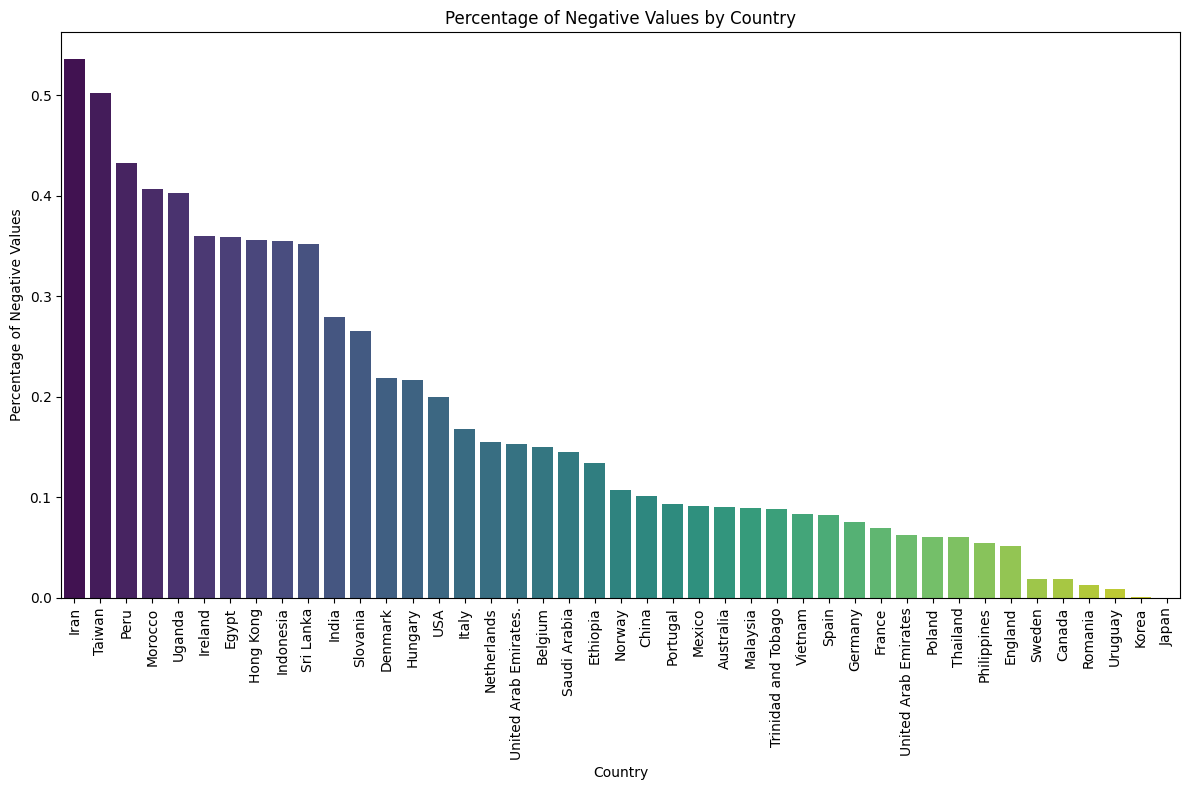

/tmp/ipython-input-2682222255.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




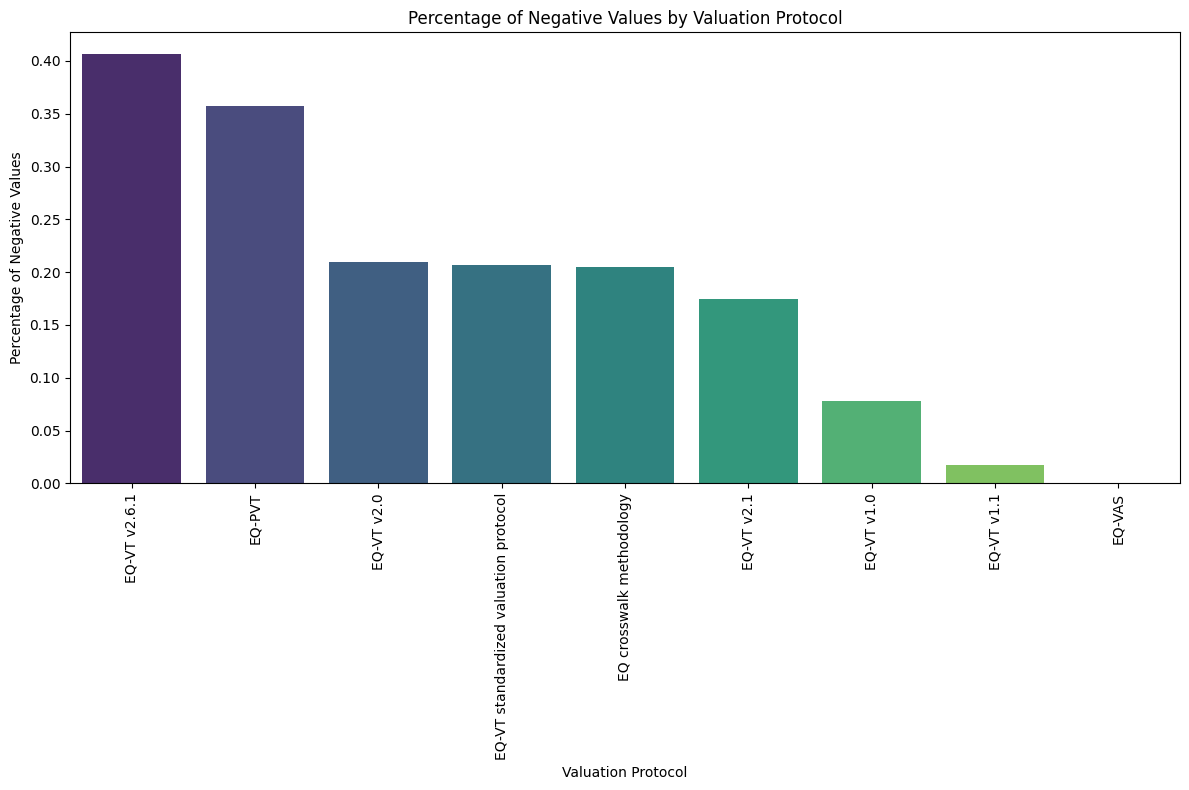

/tmp/ipython-input-2682222255.py:39: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



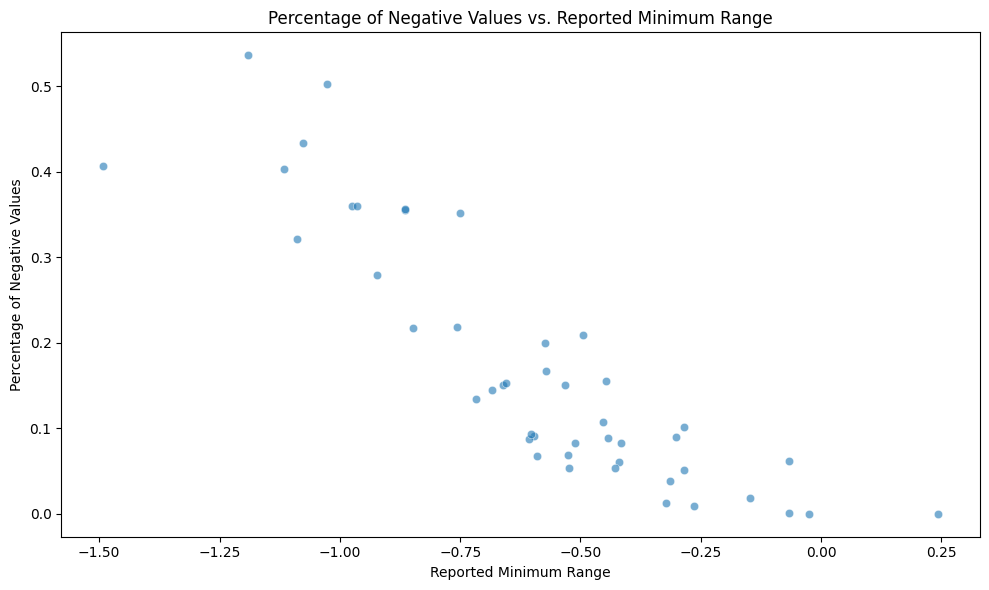

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the sample size column is numeric
# Handle potential non-numeric values and convert to numeric, coercing errors
df_filtered['sample size'] = pd.to_numeric(df_filtered['sample size'], errors='coerce')

# 1. Bar plot for mean percentage of negative values per country
plt.figure(figsize=(12, 8))
country_mean_neg = df_filtered.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False)
sns.barplot(x=country_mean_neg.index, y=country_mean_neg.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Percentage of Negative Values')
plt.title('Percentage of Negative Values by Country')
plt.tight_layout()
plt.show()

# 2. Bar plot for mean percentage of negative values per valuation protocol
plt.figure(figsize=(12, 8))
protocol_mean_neg = df_filtered.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False)
sns.barplot(x=protocol_mean_neg.index, y=protocol_mean_neg.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Valuation Protocol')
plt.ylabel('Percentage of Negative Values')
plt.title('Percentage of Negative Values by Valuation Protocol')
plt.tight_layout()
plt.show()




# 4. Scatter plot for reported minimum range vs. percentage of negative values
# Filter out rows with missing Min Range or negative percentage
df_plot_min_range = df_filtered.dropna(subset=['Min Range', '% states with negative values']).copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_min_range, x='Min Range', y='% states with negative values', alpha=0.6, palette='viridis')
plt.xlabel('Reported Minimum Range')
plt.ylabel('Percentage of Negative Values')
plt.title('Percentage of Negative Values vs. Reported Minimum Range')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 49 studies with varying characteristics, including publication year (ranging from 2013 to 2023), country (studies from multiple countries like Japan, China, UK, etc.), and sample size (ranging from 141 to 4000+).
*   A variety of valuation protocols were used, with "EQ- 5D-5L valuation protocol 1.0." being the most frequent among those reported. Many studies did not explicitly state the protocol.
*   The majority of studies adopted a "both" perspective (valuing own and hypothetical health states), while others focused on "experienced health state/valuing own health state" or did not specify.
*   Composite time trade-off (C-TTO) combined with discrete-choice experiments (DCE) was the most common preference elicitation technique.
*   Handling of negative values varied, with censoring at -1 being a prevalent technique among studies that reported this information. However, a significant number of studies did not report how negative values were handled.
*   The mean percentage of states with negative values across studies was approximately 16.17%, with a wide range from 0% to 53.6%.
*   The mean percentage of negative values varied significantly by country (e.g., higher in Iran, Taiwan, Peru; lower in Japan, Sweden, Korea) and valuation protocol (e.g., higher in EuroQol Portable Valuation Technology (EQ-PVT) and EQ-5D-5L valuation protocol 2.0).
*   The reported minimum WTD values in the studies ranged from -1.492 to 0.2433, with a mean minimum value of approximately -0.579.
*   Visualizations confirmed the variation in mean percentage of negative values across countries and protocols.
*   The scatter plot of reported minimum range vs. percentage of negative values suggests a potential relationship where studies with lower minimum reported values tend to have a higher percentage of negative values.
*   No clear linear trend was observed between the year of publication and the percentage of negative values, nor a strong visual correlation with sample size.

### Insights
*   The significant heterogeneity in the percentage of negative WTD values across studies, countries, and protocols highlights the need for further research to understand the underlying drivers of these differences, which could include cultural factors, specific health states included in valuation, and modeling choices.


In [110]:
import plotly.express as px

# Ensure there are no leading/trailing spaces in 'Country' and 'Valuation Protocol ' columns
df['Country'] = df['Country'].str.strip()
df['Valuation Protocol '] = df['Valuation Protocol '].str.strip()

# Create a world map using plotly express
# Use the 'hover_name' and 'hover_data' arguments to display country and valuation protocol on hover
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Valuation Protocol ",
                    hover_name="Country", # Display country name on hover
                    hover_data={"Valuation Protocol ": True, "Country": False}, # Display valuation protocol on hover, hide country as it's in hover_name
                    title="Countries with EQ-5D-5L Valuation Studies by Valuation Protocol")

fig.show()


Inspect the relevant columns and calculate descriptive statistics for the percentage of negative values.

In [111]:
# Inspect the columns
print("Columns related to negative values:")
display(df[['% states with negative values', 'If yes, what is the range?', 'Country', 'Valuation Protocol ']].head())

# Calculate descriptive statistics for '% states with negative values'
print("\nDescriptive statistics for '% states with negative values':")
display(df['% states with negative values'].describe())

Columns related to negative values:


,% states with negative values,"If yes, what is the range?",Country,Valuation Protocol
0,0.018600,Maximum value: 0.949\nMinimum value: −0.148,Canada,EQ-VT v1.0
1,0.051000,Maximum value: 1\n Minimum value: −0.285,England,EQ-VT v1.0
2,0.355000,Maximum value: 1\nMinimum value: −0.865,Indonesia,EQ-VT v2.0
3,0.000003,Maximum value: 1\nMinimum value: −0.025,Japan,EQ-VT v1.1
4,0.101100,Maximum value: 1\nMinimum value: −0.285,China,EQ-VT v1.0



Descriptive statistics for '% states with negative values':


,% states with negative values
count,47.000000
mean,0.167786
std,0.146735
min,0.000000
25%,0.061000
50%,0.107000
75%,0.249250
max,0.536000



Analyze the distribution of '% states with negative values' by 'Country' and 'Valuation Protocol ' by grouping and calculating the mean percentage for each category.

In [112]:
# Analyze '% states with negative values' by 'Country'
print("\nMean '% states with negative values' by Country:")
display(df.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False))

# Analyze '% states with negative values' by 'Valuation Protocol '
print("\nMean '% states with negative values' by Valuation Protocol:")
display(df.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False))


Mean '% states with negative values' by Country:


,% states with negative values
Country,
Iran,0.536000
Taiwan,0.502700
Peru,0.433000
Morocco,0.406700
Uganda,0.402500
Ireland,0.360000
Egypt,0.359400
Hong Kong,0.356500
Indonesia,0.355000



Mean '% states with negative values' by Valuation Protocol:


,% states with negative values
Valuation Protocol,
EQ-VT v2.6.1,0.406700
EQ-PVT,0.357500
EQ-VT v2.0,0.209710
EQ-VT standardized valuation protocol,0.206400
EQ crosswalk methodology,0.204987
EQ-VT v2.1,0.174664
EQ-VT v1.0,0.078383
EQ-VT v1.1,0.017501
EQ-VAS,0.000000


In [114]:
# 1. Filter the DataFrame to include only rows where the '% states with negative values' column is not null
df_filtered = df.dropna(subset=['% states with negative values']).copy()

# 2. Convert the '% states with negative values' column to a numerical data type (float)
# Check if the column is already numeric, if not, convert
if not pd.api.types.is_numeric_dtype(df_filtered['% states with negative values']):
    df_filtered['% states with negative values'] = pd.to_numeric(df_filtered['% states with negative values'])

# 3. Calculate the mean and standard deviation of the '% states with negative values' column
mean_negative_percentage = df_filtered['% states with negative values'].mean()
std_negative_percentage = df_filtered['% states with negative values'].std()

print(f"Overall Mean Percentage of Negative Values: {mean_negative_percentage:.4f}")
print(f"Overall Standard Deviation of Negative Values: {std_negative_percentage:.4f}")

# 5. Group the filtered data by potential moderators ('Country', 'Valuation Protocol ') and calculate the mean '% states with negative values' for each group.
print("\nMean % states with negative values by Country:")
display(df_filtered.groupby('Country')['% states with negative values'].mean().sort_values(ascending=False))

print("\nMean % states with negative values by Valuation Protocol:")
display(df_filtered.groupby('Valuation Protocol ')['% states with negative values'].mean().sort_values(ascending=False))

# 6 & 7. Formal meta-analysis is not feasible without sample size and standard error for each study's estimate of the percentage of negative values.
# The current data only provides the percentage, not the underlying data or the precision of the estimate.
# We will rely on descriptive statistics and subgroup means.
print("\nFormal meta-analysis using specialized libraries is not feasible with the current data as sample size and standard error for the percentage estimates are not directly available.")
print("The analysis relies on descriptive statistics and subgroup means calculated above.")

Overall Mean Percentage of Negative Values: 0.1678
Overall Standard Deviation of Negative Values: 0.1467

Mean % states with negative values by Country:


,% states with negative values
Country,
Iran,0.536000
Taiwan,0.502700
Peru,0.433000
Morocco,0.406700
Uganda,0.402500
Ireland,0.360000
Egypt,0.359400
Hong Kong,0.356500
Indonesia,0.355000



Mean % states with negative values by Valuation Protocol:


,% states with negative values
Valuation Protocol,
EQ-VT v2.6.1,0.406700
EQ-PVT,0.357500
EQ-VT v2.0,0.209710
EQ-VT standardized valuation protocol,0.206400
EQ crosswalk methodology,0.204987
EQ-VT v2.1,0.174664
EQ-VT v1.0,0.078383
EQ-VT v1.1,0.017501
EQ-VAS,0.000000



Formal meta-analysis using specialized libraries is not feasible with the current data as sample size and standard error for the percentage estimates are not directly available.
The analysis relies on descriptive statistics and subgroup means calculated above.


In [115]:
import plotly.express as px

# Calculate the mean percentage of negative values per country
country_neg_percentage_df = df_filtered.groupby('Country')['% states with negative values'].mean().reset_index()
country_neg_percentage_df.rename(columns={'% states with negative values': 'Mean Percentage of Negative Values'}, inplace=True)

# Generate a choropleth map using Plotly Express
fig = px.choropleth(country_neg_percentage_df,
                    locations="Country",
                    locationmode="country names",
                    color="Mean Percentage of Negative Values",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Mean Percentage of Negative Values by Country (Plotly Express)")
fig.show()

In [116]:
import plotly.express as px

# Ensure 'sample size' is numeric
df['sample size'] = pd.to_numeric(df['sample size'], errors='coerce')

# Remove rows with missing values in the relevant columns for plotting
df_plot = df.dropna(subset=['Year of publication', 'Country', 'sample size']).copy()

# Create the bubble plot with swapped axes
fig = px.scatter(df_plot,
                 x='Country',  # Swapped axes
                 y='Year of publication', # Swapped axes
                 size='sample size',
                 hover_name='Country',
                 hover_data={'Year of publication': True, 'sample size': True},
                 title='Bubble Plot of Sample Size by Country and Year')

fig.show()

In [117]:
import plotly.graph_objects as go
import pandas as pd

# Ensure 'Min Range' is numeric
df['Min Range'] = pd.to_numeric(df['Min Range'], errors='coerce')

# Remove rows with missing values in the relevant columns for plotting
df_plot = df.dropna(subset=['Year of publication', 'Country', 'Min Range']).copy()

# Sort by year and then country for potentially better visual organization
df_plot = df_plot.sort_values(by=['Year of publication', 'Country'])

# Create the scatter plot with bubble size based on 'Min Range'
fig = go.Figure(data=go.Scattergl(
    x=df_plot['Country'],
    y=df_plot['Year of publication'],
    mode='markers',
    marker=dict(
        size=abs(df_plot['Min Range']) * 100,  # Scale bubble size based on the absolute of Min Range (adjust scaling factor as needed)
        sizemode='area',
        # Adjust sizeref and sizemin based on the new size column
        sizeref=2.*max(abs(df_plot['Min Range']))/(50.**2) if not df_plot['Min Range'].empty else 1, # Adjust sizeref calculation
        sizemin=4,
        color=df_plot['Min Range'], # Color based on Min Range
        colorscale='Viridis', # Choose a colorscale
        colorbar=dict(title='Minimum Value')
    ),
    text=df_plot['Min Range'], # Text for hover (display Min Range on hover)
    hoverinfo='text+x+y'
))

# Add annotations for Minimum Value inside the bubbles
annotations = []
for index, row in df_plot.iterrows():
    annotations.append(dict(
        x=row['Country'],
        y=row['Year of publication'],
        xref='x',
        yref='y',
        text=f"{row['Min Range']:.2f}", # Format the Min Range value for display
        showarrow=False,
        xanchor='center',
        yanchor='middle',
        font=dict(
            color='white',  # Adjust text color for visibility against bubble color
            size=8         # Adjust text size as needed
        )
    ))

fig.update_layout(
    title='Bubble Plot of Minimum Value by Country and Year',
    xaxis_title='Country',
    yaxis_title='Year of Publication',
    annotations=annotations,
    hovermode='closest',
    height=700 # Adjust height as needed
)

fig.show()

In [119]:
import plotly.express as px

# Generate a choropleth map using Plotly Express
fig = px.choropleth(country_neg_percentage_df,
                    locations="Country",
                    locationmode="country names",
                    color="Mean Percentage of Negative Values",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Mean Percentage of Negative Values by Country (Plotly Express)")
fig.show()

In [120]:
import plotly.graph_objects as go
import pandas as pd
import requests

# Ensure '% states with negative values' is numeric
df['% states with negative values'] = pd.to_numeric(df['% states with negative values'], errors='coerce')

# Remove rows with missing values in the relevant columns for plotting
df_plot = df.dropna(subset=['Country', '% states with negative values']).copy()

# Calculate the mean percentage of negative values per country
country_neg_percentage_df = df_plot.groupby('Country')['% states with negative values'].mean().reset_index()
country_neg_percentage_df.rename(columns={'% states with negative values': 'Mean Percentage of Negative Values'}, inplace=True)

# Add latitude and longitude to the dataframe (using a simplified approach - a more robust solution would involve a dedicated geocoding library or dataset)
# For this example, we'll use a predefined dictionary for some countries and fall back if not found
country_coordinates = {
    'Canada': {'lat': 56.1304, 'lon': -106.3468},
    'Portugal': {'lat': 39.3999, 'lon': -8.2245},
    'England': {'lat': 52.3555, 'lon': -1.1743}, # Using approximate center for England
    'Indonesia': {'lat': -0.7893, 'lon': 117.9213},
    'Sri Lanka': {'lat': 7.8731, 'lon': 80.7718},
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'Netherlands': {'lat': 52.1326, 'lon': 5.2913},
    'Korea': {'lat': 35.9078, 'lon': 127.7669},
    'United Arab Emirates': {'lat': 23.4241, 'lon': 53.8478},
    'Uruguay': {'lat': -32.4228, 'lon': -55.7658},
    'Poland': {'lat': 51.9194, 'lon': 19.1451},
    'Taiwan': {'lat': 23.6978, 'lon': 120.9605},
    'Malaysia': {'lat': 4.2105, 'lon': 101.9758},
    'Ireland': {'lat': 53.1424, 'lon': -7.6921},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'USA': {'lat': 37.0902, 'lon': -95.7129},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694},
    'Iran': {'lat': 32.4279, 'lon': 53.6880},
    'Slovania': {'lat': 46.1512, 'lon': 14.9955},
    'Hungary': {'lat': 47.1625, 'lon': 19.5033},
    'Peru': {'lat': -9.1900, 'lon': -75.0152},
    'Sweden': {'lat': 60.1282, 'lon': 18.6435},
    'Vietnam': {'lat': 14.0583, 'lon': 108.2772},
    'France': {'lat': 46.2276, 'lon': 2.2137},
    'Ethiopia': {'lat': 9.1450, 'lon': 40.4897},
    'Unites States': {'lat': 37.0902, 'lon': -95.7129}, # Assuming similar to USA
    'Mexico': {'lat': 23.6345, 'lon': -102.5528},
    'Denmark': {'lat': 56.2639, 'lon': 9.5018},
    'Belgium': {'lat': 50.5039, 'lon': 4.4699},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'Romania': {'lat': 45.9432, 'lon': 24.9668},
    'Philippines': {'lat': 12.8797, 'lon': 121.7740},
    'Uganda': {'lat': 1.3733, 'lon': 32.2903},
    'Egypt': {'lat': 26.8206, 'lon': 30.8025},
    'Italy': {'lat': 41.8719, 'lon': 12.5674},
    'Trinidad and Tobago': {'lat': 10.6918, 'lon': -61.2225},
    'Kingdom of Saudi Arabia': {'lat': 24.7742, 'lon': 46.7386},
    'Morocco': {'lat': 31.7917, 'lon': -7.0926},
    'United Arab Emirates.': {'lat': 23.4241, 'lon': 53.8478}, # Assuming similar to United Arab Emirates
    'Norway': {'lat': 60.4720, 'lon': 8.4689},
    'Ghana': {'lat': 7.9465, 'lon': -1.0232},
    'Spain': {'lat': 40.4637, 'lon': -3.7492}
}


# Add latitude and longitude to the dataframe
country_neg_percentage_df['lat'] = country_neg_percentage_df['Country'].apply(lambda x: country_coordinates.get(x, {}).get('lat'))
country_neg_percentage_df['lon'] = country_neg_percentage_df['Country'].apply(lambda x: country_coordinates.get(x, {}).get('lon'))

# Remove countries for which we don't have coordinates
country_neg_percentage_df.dropna(subset=['lat', 'lon'], inplace=True)

# Check if the DataFrame is empty after dropping NaNs
if not country_neg_percentage_df.empty:

    # Create the choropleth map
    fig = go.Figure(data=go.Choropleth(
        locations = country_neg_percentage_df['Country'],
        locationmode = 'country names',
        z = country_neg_percentage_df['Mean Percentage of Negative Values'],
        colorscale = 'Plasma',
        colorbar_title = 'Mean % Negative Values',
        hoverinfo='none' # Disable hover
    ))

    # Add text labels with country name and percentage of negative values
    fig.add_trace(go.Scattergeo(
        locations = country_neg_percentage_df['Country'],
        locationmode = 'country names',
        mode = 'text',
        text = country_neg_percentage_df.apply(lambda row: f"{row['Country']}<br>{row['Mean Percentage of Negative Values']:.2f}%", axis=1), # Include percentage in label
        textposition = "bottom center",
        hoverinfo = 'none', # Disable hover for text
        textfont = dict(
            color = 'black',
            size = 8
        )
    ))


    fig.update_layout(
        title_text = 'World Map: Percentage of Negative Values by Country (with Labels)',
        geo = dict(
            scope='world',
            projection_type='natural earth',
            showland = True,
            landcolor = "rgb(243, 243, 243)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            showlakes = True,
            lakecolor = "rgb(255, 255, 255)",
            showsubunits = True,
            showcountries = True,
            resolution = 110
        ),
        height=700 # Adjust height as needed
    )

    fig.show()

else:
    print("No data available to create the map after filtering.")